In [96]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam

In [97]:
x0 = 1
x1 = 2

def init_random_params(scale, layer_sizes, rs=npr.RandomState(42)):
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

def tanh(x):
    return (2 / (1.0 + np.exp(-2*x))) - 1

def psi(nnparams, inputs):
    origInput = inputs
    xTilde = (origInput - x0) / (x1 - x0)
    
    for W, b in nnparams:
        outputs = np.dot(inputs, W) + b
        inputs = tanh(outputs)    
        
    return (1-np.exp(xTilde * (1 - xTilde))) * outputs

dpsi = elementwise_grad(psi, 1) # dpsi/dx 
ddpsi = elementwise_grad(dpsi, 1) # d^2psi/dx^2

In [98]:
nnparams = init_random_params(0.1, layer_sizes=[1, 32, 1])
params = {'nn': nnparams, 'E': 0.4}

x = np.linspace(0, 1, 200)[:, None]

def objective(params, step):
    nnparams = params['nn']
    E = params['E']        
    # This is Schrodinger's eqn
    zeq = -0.5 * psipp(nnparams, x)  - E*psi(nnparams, x) 
    y2 = psi(nnparams, x)**2
    # This is a numerical trapezoid integration
    prob = np.sum((y2[1:] + y2[0:-1]) / 2 * (x[1:] - x[0:-1]))
    return np.mean(zeq**2) + (1.0 - prob)**2

# This gives us feedback from the optimizer
def callback(params, step, g):
    if step % 1000 == 0:
        print("Iteration {0:3d} objective {1}".format(step,
                                                      objective(params, step)))

In [99]:
params = adam(grad(objective), params,
              step_size=0.001, num_iters=5001, callback=callback) 

print(params['E'])

Iteration   0 objective 0.9979496203934521
Iteration 1000 objective 0.0005727100088359896
Iteration 2000 objective 0.0001171679222694792
Iteration 3000 objective 3.173461318184354e-05
Iteration 4000 objective 1.022459198066395e-05
Iteration 5000 objective 3.6300855722891745e-06
0.003217322532237151


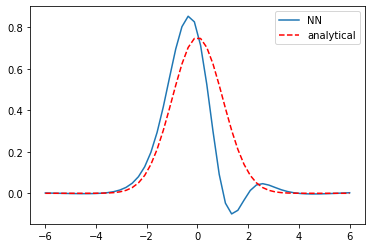

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-6, 6)[:, None]
y = psi(params['nn'], x)

plt.plot(x, y, label='NN')
plt.plot(x, (1/np.pi)**0.25 * np.exp(-x**2 / 2), 'r--', label='analytical')
plt.legend()